## 차원축소
- 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬수 있는 방법.

## 주성분 분석(PCA)
- 대표적인 차원축소 알고리즘.    
- 주성분벡터의 원소 개수는 원본 data set에 있는 특성 개수와 같다.

In [18]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [19]:
#PCA는 n_components매개변수에 주성분의개수를 지정해줘야한다.
#PCA는 비지도학습이기 때문에 fit()메서드에 타깃값을 제공하지 않는다.
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [20]:
#주성분은 components_속성에 저장되어 있다.
print(pca.components_.shape)

(50, 10000)


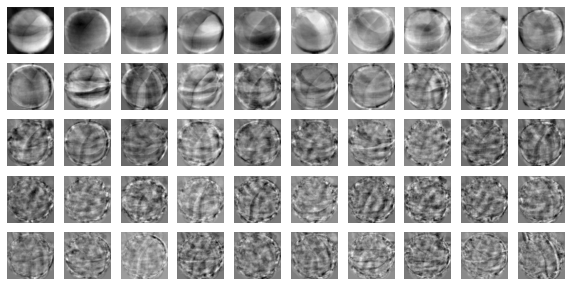

In [21]:
#주성분 그리기.
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr) #n은 샘플수
    
    #한줄에 10개씩 이미지를 그린다.
    rows = int(np.ceil(n/10))
    
    #행이 1개이면 cols는 샘플수와 같다. 그렇지 않으면 clos = 10이다.
    cols = n if rows < 2 else 10
    
    fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze = False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10+j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

draw_fruits(pca.components_.reshape(-1, 100, 100))

In [22]:
print(fruits_2d.shape)

(300, 10000)


In [23]:
#transform메서드를 통해 원본데이터의 차원을 50으로 줄이기.
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 차원축소 후 원본 데이터 재구성.

In [24]:
#inverse_transform()메서드를 사용해 차원을 복원하기.
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


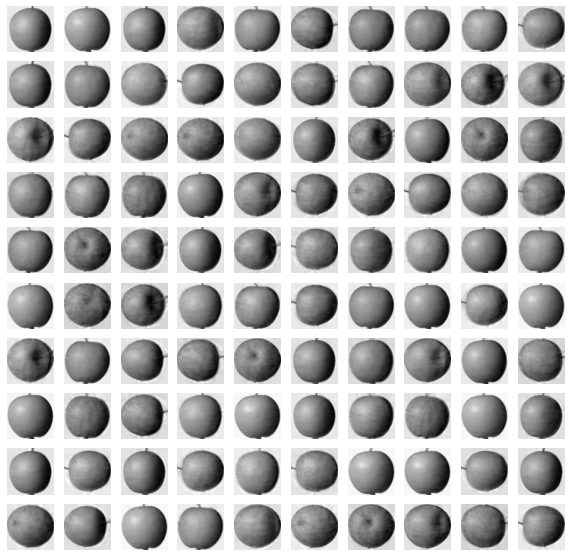

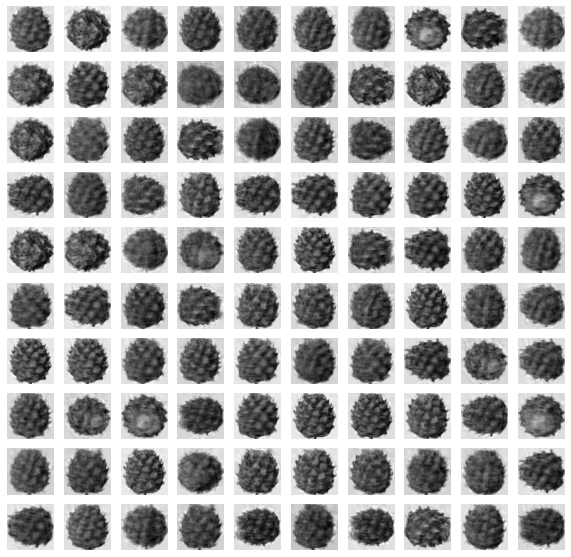

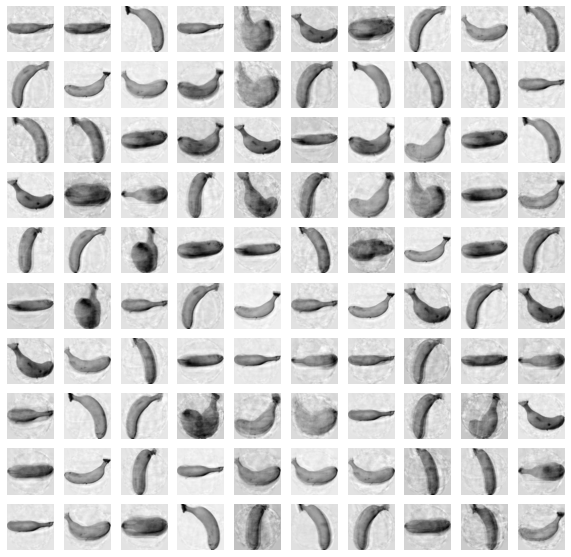

In [13]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## explained variance(설명된 분산)
- 원본데이터의 분산을 얼마나 잘 나타내는지 기록한 값.

In [14]:
#explained_variance_ratio_에 각 주성분의 분산비율이 기록되어 있다. 첫번째 주성분의 분산비율이 가장 크다.
#92%정도의 분산을 유지하고 있음.
print(np.sum(pca.explained_variance_ratio_))

0.9214417309887047


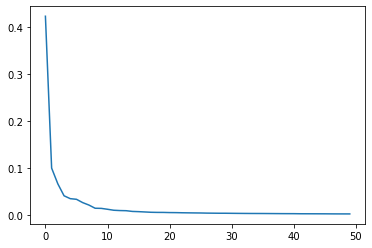

In [25]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

## 차원축소에 로지스틱 회귀 알고리즘 사용하기.

In [26]:
#로지스틱 회귀 알고리즘 사용
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [27]:
#로지스틱 회귀는 target data가 있어야 하므로 사과 : 0, 파인애플 : 1, 바나나 : 2로 지정한다.
target = np.array([0]*100 + [1]*100 + [2]*100)

In [29]:
#cross_validate()로 교차검증 수행하기.
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.3913721561431885


In [31]:
#PCA를 사용한 data를 교차검증 해보기.
#정확도와 속도 모두 증가하였음.
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.018111419677734376


## PCA 분산의 비율 입력.

In [32]:
#PCA에 원하는 분산의 비율을 입력하기. 지정된 비율에 도달할때 까지 자동으로 주성분을 찾는다.
#분산의 50%에 해당하는 주성분을 찾도록 만들기.
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [36]:
#비율로 찾은 주성분의 수. 즉 2개의 특성만으로 분산의 50%를 표현할 수 있다.
print(pca.n_components_)

2


In [37]:
#원본데이터 변환하기.
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [40]:
#교차검증하기.
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.027271032333374023


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

## 차원축소에 k-Means 알고리즘 사용하기.

In [41]:
#차원 축소한 data인 fruits_pca를 사용하기.
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


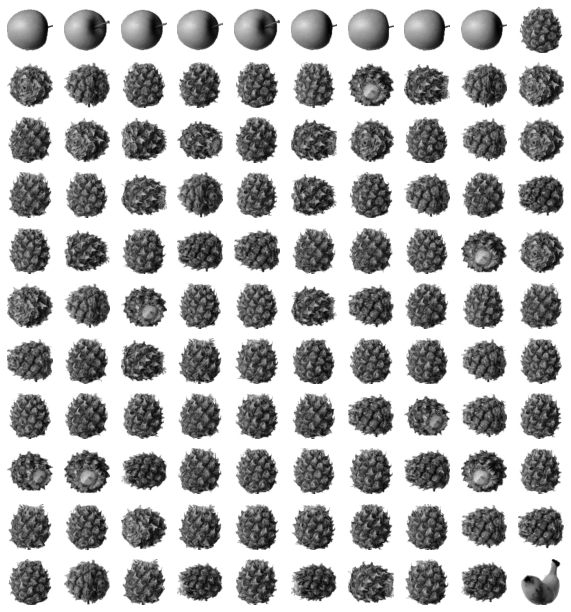

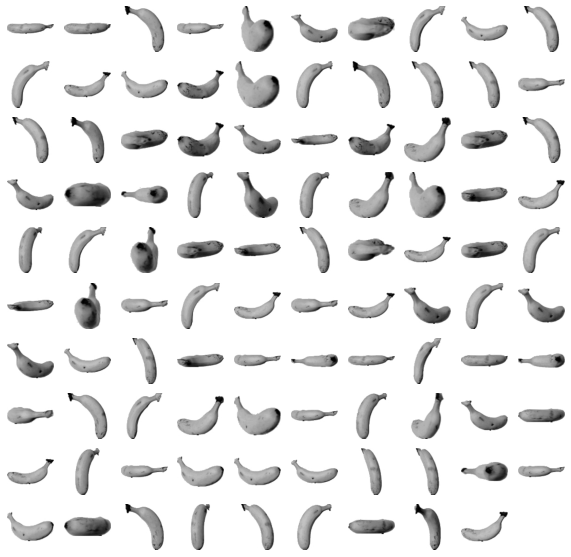

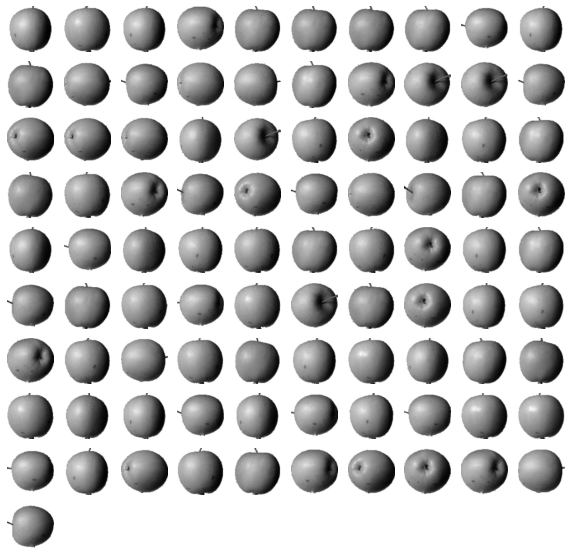

In [42]:
#과일이미지 출력,
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

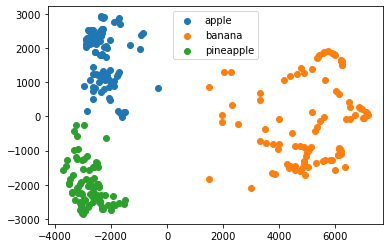

In [45]:
#산점도 그려보기.
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()